**데이터 전처리**

In [ ]:
import pandas as pd

dat = pd.read_csv('/content/drive/MyDrive/netflix_original_종합_선우형(sum).csv', encoding='cp949')

In [ ]:
# 결측치 포함 행 제거
dat = dat.dropna(axis=0, how='any')
dat.reset_index(drop=True, inplace=True)

In [ ]:
# 불필요한 문자 제거
import re

lst = dat.columns.to_list()
for i in lst:
  dat[i] = dat[i].astype(str)
  dat[i] = dat[i].astype(str).str.replace('-', '0')
  for j in range(len(dat)):
    dat[i][j] = re.sub("[',\[\]]", '', dat[i][j])
    if dat[i][j] == '':
      dat[i][j]='0'

dat.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Title,Genre,ratings,voters,All rating,18_rating,18-29_rating,30-44_rating,45_rating,Males_rating,Famales_rating,All voter,18_voter,18-29_voter,30-44_voter,45_voter,Males_voter,Famales_voter,age,year,harmful-themes,lewdness,violence,profanity,fear,drugs,immatatable
0,House of Cards,Political drama,8.7,468505,1,8.4,8.8,8.7,8.5,8.7,8.7,468910,95,91386,175163,43165,280510,58292,청소년관람불가,2018.0,높음,높음,높음,높음,보통,높음,높음


In [ ]:
# 결측치 포함 행 제거2
dat = dat[dat['harmful-themes'] != '']
dat.reset_index(drop=True, inplace=True)
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           578 non-null    object
 1   Genre           578 non-null    object
 2   ratings         578 non-null    object
 3   voters          578 non-null    object
 4   All rating      578 non-null    object
 5   18_rating       578 non-null    object
 6   18-29_rating    578 non-null    object
 7   30-44_rating    578 non-null    object
 8   45_rating       578 non-null    object
 9   Males_rating    578 non-null    object
 10  Famales_rating  578 non-null    object
 11  All voter       578 non-null    object
 12  18_voter        578 non-null    object
 13  18-29_voter     578 non-null    object
 14  30-44_voter     578 non-null    object
 15  45_voter        578 non-null    object
 16  Males_voter     578 non-null    object
 17  Famales_voter   578 non-null    object
 18  age       

In [ ]:
# 문자들을 숫자로 변환
pd.unique(dat['harmful-themes'])

array(['높음', '보통', '0', '다소높음'], dtype=object)

In [ ]:
for i in range(20,27):
  for j in range(len(dat)):
    if dat.iloc[j,i]=='높음':
      dat.iloc[j,i]=3
    elif dat.iloc[j,i]=='다소높음':
      dat.iloc[j,i]=2
    elif dat.iloc[j,i]=='보통':
      dat.iloc[j,i]=1
    else:
      dat.iloc[j,i]=0

In [ ]:
pd.unique(dat['age'])

array(['청소년관람불가', '12세이상관람가', '전체관람가', '15세이상관람가'], dtype=object)

In [ ]:
for i in range(len(dat)):
  if dat['age'][i]=='청소년관람불가':
    dat['age'][i]=3
  elif dat['age'][i]=='15세이상관람가':
    dat['age'][i]=2
  else:
    dat['age'][i]=1

In [ ]:
dat.head(1)

,Title,Genre,ratings,voters,All rating,18_rating,18-29_rating,30-44_rating,45_rating,Males_rating,Famales_rating,All voter,18_voter,18-29_voter,30-44_voter,45_voter,Males_voter,Famales_voter,age,year,harmful-themes,lewdness,violence,profanity,fear,drugs,immatatable
0,House of Cards,Political drama,8.7,468505,1,8.4,8.8,8.7,8.5,8.7,8.7,468910,95,91386,175163,43165,280510,58292,3,2018.0,3,3,3,3,1,3,3


In [ ]:
# 형태변환 
dat.iloc[:,2] = dat.iloc[:,2].astype(float)
dat.iloc[:,3] = dat.iloc[:,3].astype(int)
dat.iloc[:,4:11] = dat.iloc[:,4:11].astype(float)
dat.iloc[:,11:18] = dat.iloc[:,11:18].astype(int)
dat.iloc[:,19] = dat.iloc[:,19].astype(float).astype(int)
dat.iloc[:,15] = dat.iloc[:,15].astype(int)
dat.iloc[:,17:] = dat.iloc[:,17:].astype(int)
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           578 non-null    object 
 1   Genre           578 non-null    object 
 2   ratings         578 non-null    float64
 3   voters          578 non-null    int64  
 4   All rating      578 non-null    float64
 5   18_rating       578 non-null    float64
 6   18-29_rating    578 non-null    float64
 7   30-44_rating    578 non-null    float64
 8   45_rating       578 non-null    float64
 9   Males_rating    578 non-null    float64
 10  Famales_rating  578 non-null    float64
 11  All voter       578 non-null    int64  
 12  18_voter        578 non-null    int64  
 13  18-29_voter     578 non-null    int64  
 14  30-44_voter     578 non-null    int64  
 15  45_voter        578 non-null    int64  
 16  Males_voter     578 non-null    int64  
 17  Famales_voter   578 non-null    int

In [ ]:
dat.describe()

,ratings,voters,All rating,18_rating,18-29_rating,30-44_rating,45_rating,Males_rating,Famales_rating,All voter,18_voter,18-29_voter,30-44_voter,45_voter,Males_voter,Famales_voter,age,year,harmful-themes,lewdness,violence,profanity,fear,drugs,immatatable
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000
mean,6.637889,20923.584775,0.347751,5.310554,6.608304,6.488581,6.425433,6.443772,6.689273,20996.517301,42.674740,4036.816609,7258.806228,2170.072664,11240.370242,3214.439446,2.249135,2018.202422,2.091696,1.233564,1.294118,1.802768,0.837370,1.335640,1.363322
std,2.492526,49958.826302,0.476669,2.669666,1.092070,1.029533,0.994400,1.053510,1.052861,50063.062884,112.394028,10442.882895,16733.009221,4362.836940,27661.393774,7581.840917,0.767770,1.313387,0.931018,1.191731,1.173066,1.054425,1.090937,1.119301,1.229125
min,2.500000,84.000000,0.000000,0.000000,2.300000,2.600000,2.900000,2.600000,2.200000,84.000000,0.000000,19.000000,8.000000,25.000000,4.000000,1.000000,1.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.900000,1467.000000,0.000000,4.500000,5.900000,5.825000,5.800000,5.800000,6.000000,1481.750000,3.000000,265.250000,462.250000,213.250000,666.250000,138.250000,2.000000,2018.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,6.600000,4461.500000,0.000000,6.000000,6.700000,6.500000,6.400000,6.500000,6.800000,4503.500000,8.000000,834.500000,1507.000000,582.000000,2245.500000,670.000000,2.000000,2018.000000,2.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000
75%,7.300000,16982.750000,1.000000,7.000000,7.400000,7.200000,7.100000,7.200000,7.400000,17002.750000,34.750000,3145.500000,5803.500000,1967.250000,7630.750000,3172.750000,3.000000,2019.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
max,61.000000,468505.000000,1.000000,10.000000,9.000000,8.800000,8.600000,8.800000,8.800000,468910.000000,1700.000000,99323.000000,175163.000000,43165.000000,280510.000000,85931.000000,3.000000,2021.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [ ]:
# Q2 값으로 성공 실패 나누기
for i in range(len(dat)):
  if float(dat['ratings'][i]) >= 6.6:
    dat['ratings'][i]=1
  else:
    dat['ratings'][i]=0

dat.iloc[0:30, 2].values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.])

In [ ]:
dat = dat.drop(['Title', 'Genre', 'All rating'], axis=1)
dat.head(1)

,ratings,voters,18_rating,18-29_rating,30-44_rating,45_rating,Males_rating,Famales_rating,All voter,18_voter,18-29_voter,30-44_voter,45_voter,Males_voter,Famales_voter,age,year,harmful-themes,lewdness,violence,profanity,fear,drugs,immatatable
0,1.0,468505,8.4,8.8,8.7,8.5,8.7,8.7,468910,95,91386,175163,43165,280510,58292,3,2018,3,3,3,3,1,3,3


**로지스틱 회귀분석 방법 1**

In [ ]:
# training set
from sklearn.model_selection import train_test_split
x = dat.iloc[:, 1:]
y = dat.iloc[:, 0]

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [ ]:
# standardization
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(x_train)
x_train_ss = ss.transform(x_train)
x_test_ss = ss.transform(x_test) 

In [ ]:
# LogisitcRegression + GridSearch
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l2', 'l1'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
gs = GridSearchCV(estimator=lr, param_grid = param_grid, cv=5, n_jobs=-1)
gs.fit(x_train_ss, y_train)
print('best params: {}'.format(gs.best_params_))

best params: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
lr2 = gs.fit(x_train_ss, y_train)
print('train score: {}'.format(lr2.score(x_train_ss, y_train)))
print('test score: {}'.format(lr2.score(x_test_ss, y_test)))

train score: 0.9976905311778291
test score: 0.9517241379310345


In [ ]:
# GridSearchCV가 coef_ 지원 x => best_params_를 다시 lr에 적합
lr3 = LogisticRegression(C=10, penalty='l2', solver='newton-cg')
lr3.fit(x_train_ss, y_train)
print(lr3.coef_, lr3.intercept_)

[[ 1.53383882 -0.03838518  2.12458341  7.0390427   1.12746424  4.58664356
   2.540239    1.18739929 -0.23073683 -0.09107039 -0.73375721 -1.12973122
  -0.31903941 -0.54179712 -1.3918135  -0.46521742  1.13840317 -0.1620975
   0.07739115  0.17871305  0.16216509 -0.0110894  -0.15672661]] [-0.67109189]


In [ ]:
# 평가 지표
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

pred_train = lr2.predict(x_train_ss)
pred_test = lr2.predict(x_test_ss)

def total_score(y, pred_y):
  acc = accuracy_score(y, pred_y)
  f1 = f1_score(y, pred_y, average='micro')
  recall = recall_score(y, pred_y, average='micro')
  precision = precision_score(y, pred_y, average='micro') 
  print(f'정확도:{acc}, f1:{f1}, 재현율:{recall}, 정밀도:{precision}')

total_score(y_train, pred_train)
total_score(y_test, pred_test)

정확도:0.9976905311778291, f1:0.9976905311778291, 재현율:0.9976905311778291, 정밀도:0.9976905311778291
정확도:0.9517241379310345, f1:0.9517241379310345, 재현율:0.9517241379310345, 정밀도:0.9517241379310345


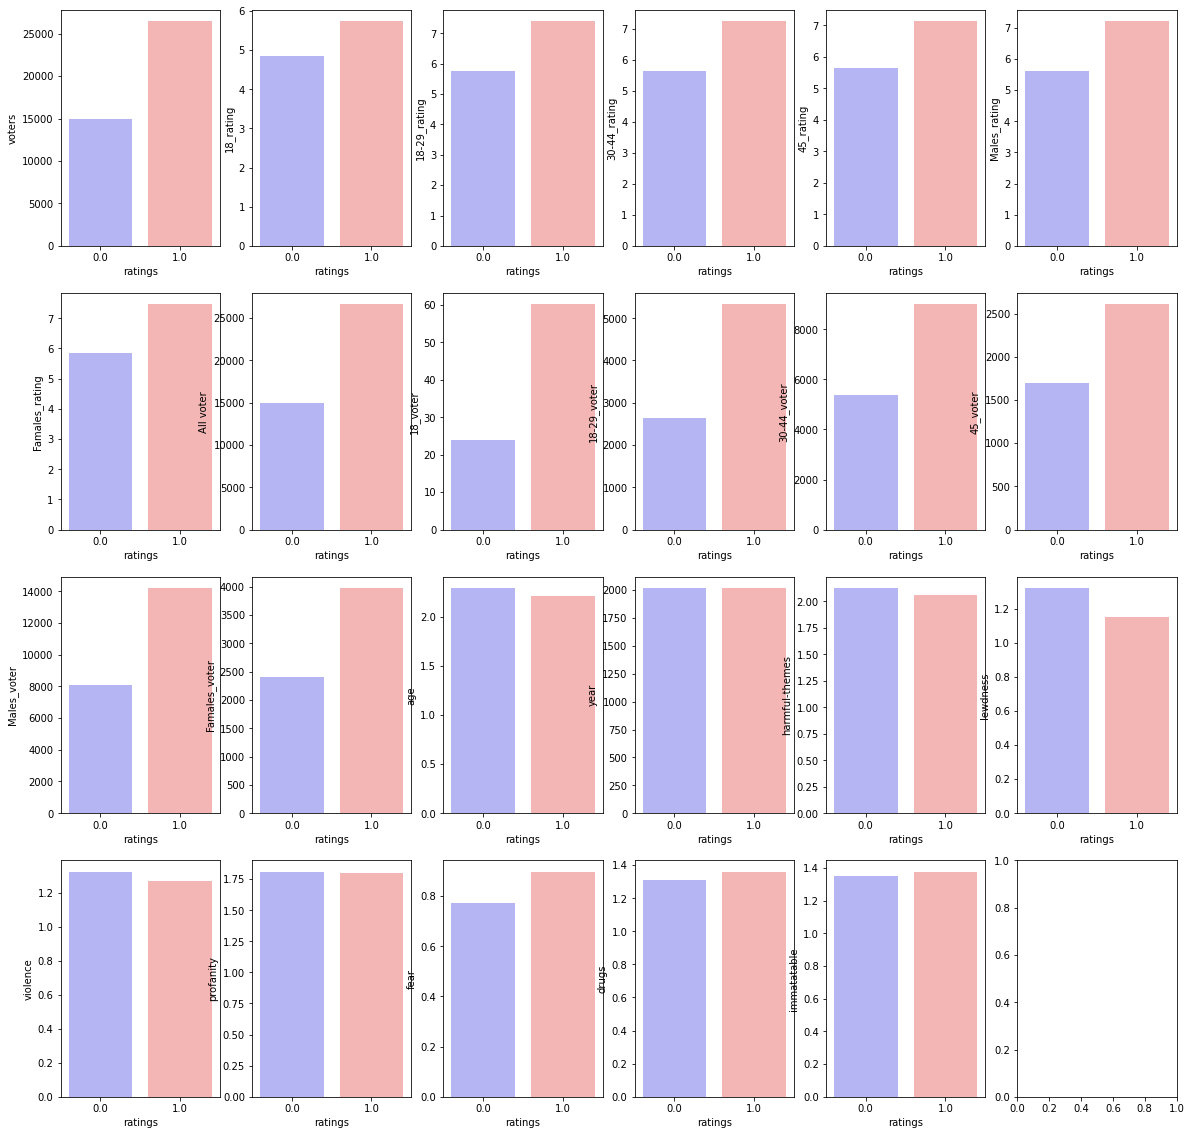

,ratings,voters,18_rating,18-29_rating,30-44_rating,45_rating,Males_rating,Famales_rating,All voter,18_voter,18-29_voter,30-44_voter,45_voter,Males_voter,Famales_voter,age,year,harmful-themes,lewdness,violence,profanity,fear,drugs,immatatable
0,0.0,14893.755396,4.841727,5.748201,5.650719,5.655036,5.602158,5.86295,14941.269784,23.892086,2646.446043,5385.050360,1700.758993,8052.395683,2395.895683,2.291367,2018.363309,2.125899,1.320144,1.323741,1.809353,0.773381,1.309353,1.348921
1,1.0,26511.226667,5.745000,7.405333,7.265000,7.139333,7.223667,7.45500,26607.713333,60.080000,5325.226667,8995.153333,2604.970000,14194.560000,3972.956667,2.210000,2018.053333,2.060000,1.153333,1.266667,1.796667,0.896667,1.360000,1.376667


In [ ]:
# 성공, 실패 집단 평균 비교
central = dat.groupby('ratings').mean().reset_index()
features = list(central.keys()[1:])

fig, ax = plt.subplots(4, 6, figsize=(20,20))

ax = ax.ravel()
position = 0

for i in features:
  sns.barplot(data=central, x='ratings', y=i, ax=ax[position], palette='bwr')
  position += 1

plt.show()
display(central)

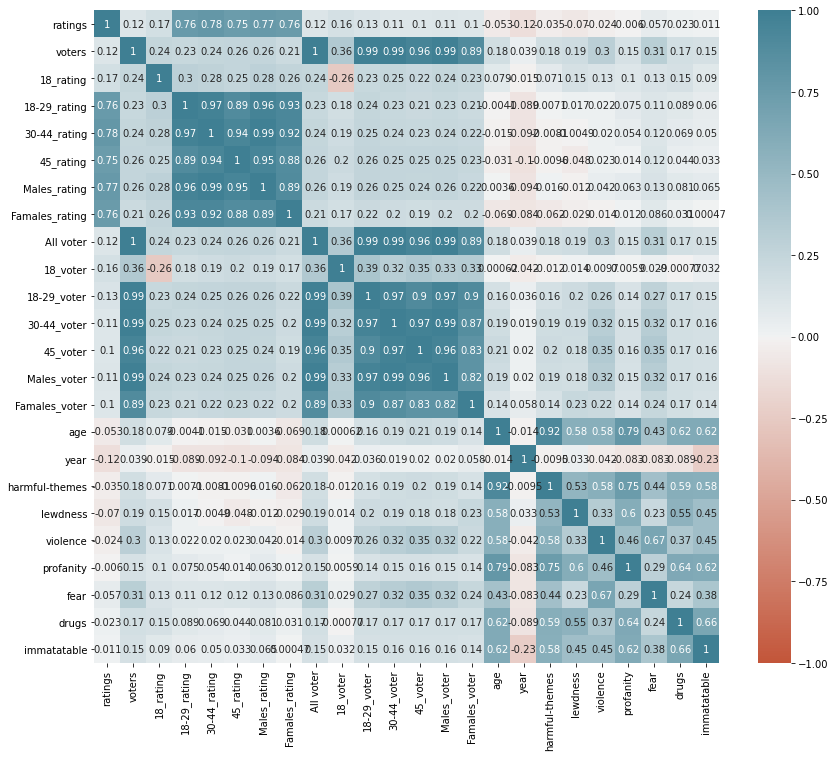

In [ ]:
# Correlations
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,12))

sns.heatmap(dat.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True)

**로지스틱 회귀분석 방법 2**

In [ ]:
import statsmodels.api as sm

x = dat[['18_rating', '18-29_rating', '30-44_rating', '45_rating', 'Males_rating', 'Famales_rating', 'All voter',
 '18_voter', '18-29_voter', '30-44_voter', '45_voter', 'Males_voter', 'Famales_voter', 'age', 'year', 
 'harmful-themes', 'lewdness', 'violence', 'profanity', 'fear', 'drugs', 'immatatable']]
y = dat['ratings']

x = sm.add_constant(x)
model = sm.Logit(y, x)
results = model.fit()

results.summary()

Optimization terminated successfully.
         Current function value: 0.060796
         Iterations 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ratings   No. Observations:                  578
Model:                          Logit   Df Residuals:                      555
Method:                           MLE   Df Model:                           22
Date:                Thu, 13 May 2021   Pseudo R-squ.:                  0.9122
Time:                        14:34:40   Log-Likelihood:                -35.140
converged:                       True   LL-Null:                       -400.22
Covariance Type:            nonrobust   LLR p-value:                3.341e-140
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2424.1941    855.366      2.834      0.005     747.708    4100.680
18_rating         -0.1432      0.127     -1.127      0.260      -0.392       0.106
18-29_rating      -2.7848      1.573     -1.771      0.077      -5.867       0.297
30-44_rating      15.5187      3.446      4.503      0.000       8.764      22.274
45_rating         -1.2729      1.439     -0.885      0.376      -4.093       1.548
Males_rating       4.8840      2.371      2.060      0.039       0.236       9.532
Famales_rating     3.1085      1.266      2.455      0.014       0.627       5.590
All voter          0.0013      0.000      2.916      0.004       0.000       0.002
18_voter          -0.0007      0.005     -0.147      0.883      -0.010       0.009
18-29_voter       -0.0022      0.001     -2.230      0.026      -0.004      -0.000
30-44_voter       4.8e-05      0.001      0.076      0.940      -0.001       0.001
45_voter          -0.0018      0.001     -1.569      0.117      -0.004       0.000
Males_voter       -0.0011      0.001     -1.769      0.077      -0.002       0.000
Famales_voter     -0.0011      0.001     -1.719      0.086      -0.002       0.000
age               -3.1169      1.535     -2.030      0.042      -6.126      -0.107
year              -1.2622      0.429     -2.939      0.003      -2.104      -0.420
harmful-themes     2.3094      1.129      2.046      0.041       0.097       4.521
lewdness          -0.0494      0.482     -0.103      0.918      -0.994       0.895
violence           0.1292      0.482      0.268      0.789      -0.816       1.075
profanity         -0.0788      0.590     -0.134      0.894      -1.234       1.077
fear              -0.4980      0.503     -0.991      0.322      -1.483       0.487
drugs             -0.2976      0.445     -0.669      0.503      -1.169       0.574
immatatable        0.6062      0.518      1.171      0.242      -0.408       1.621
==================================================================================

Possibly complete quasi-separation: A fraction 0.65 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""